<a href="https://colab.research.google.com/github/Prateek-Bhardwaj/Machine-Learning-Projects/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Time Series forecasting using tensorflow

In time series we deal with data over time. In this notebook we are going to predict bitcoin price using different models and looking which one is best

Downloading and visualising our data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-11-28 19:17:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2021-11-28 19:17:46 (5.97 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


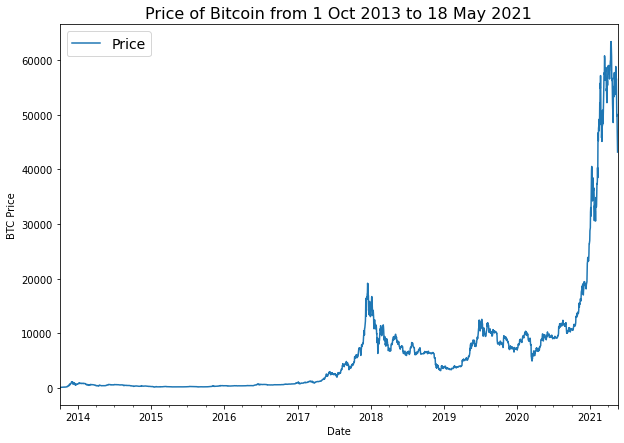

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

### Model 1: Baseline Model(Naive model)

In [ ]:
div = int(0.8*len(bitcoin_prices))
div

2229

In [ ]:
X_train,y_train = timesteps[:div], prices[:div]
X_test,y_test = timesteps[div:], prices[div:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2229, 2229, 558, 558)

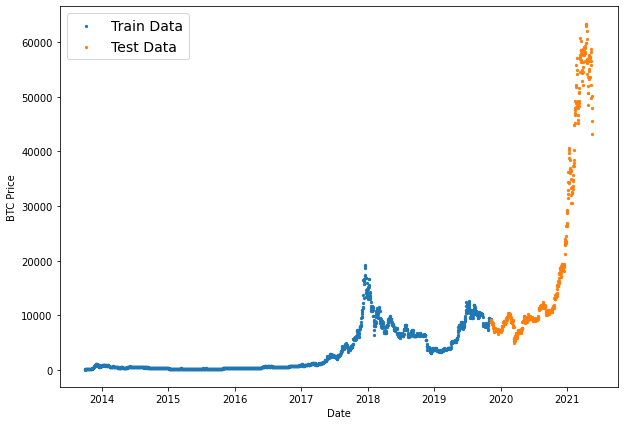

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train Data")
plt.scatter(X_test,y_test,s=5,label="Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
def plot_series(timesteps,prices,start=0,end=None,label=None, format="."):
  plt.plot(timesteps[start:end],prices[start:end],format,label=label,)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=15)
  plt.grid(True)

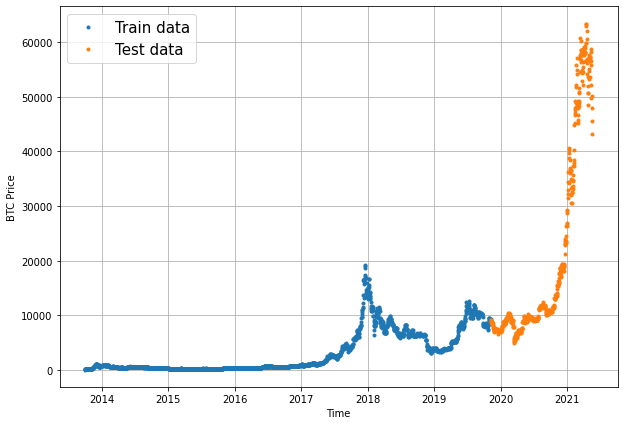

In [ ]:
plt.figure(figsize=(10, 7))
plot_series(timesteps=X_train,prices=y_train, label="Train data")
plot_series(timesteps=X_test,prices=y_test, label="Test data")

In [ ]:
naive_forecast = y_test[:-1]

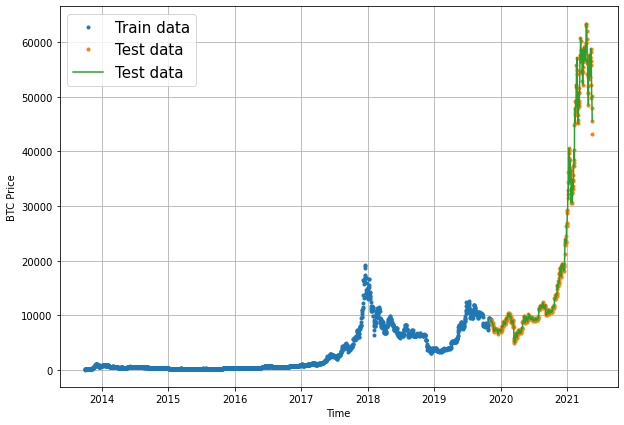

In [ ]:
plt.figure(figsize=(10, 7))
plot_series(timesteps=X_train,prices=y_train, label="Train data")
plot_series(timesteps=X_test,prices=y_test, label="Test data")
plot_series(timesteps=X_test[1:] ,prices=naive_forecast, label="Test data", format="-")

Creating important function to use in future in this notebook.


In [ ]:
import tensorflow as tf
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive

In [ ]:
def error_metrix(y_true,y_pred):
  y_true = tf.cast(y_true,dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)
  if mae.ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  return {"MAE":mae.numpy(),
          "MSE":mse.numpy(),
          "Mean absolute percentage error":mape.numpy(),
          "Mean absolute scaled error":mase.numpy()}

In [ ]:
naive_error_metrics = error_metrix(y_true=y_test[1:],y_pred=naive_forecast)
naive_error_metrics

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'Mean absolute percentage error': 2.516525,
 'Mean absolute scaled error': 0.99957}

### Model 1: Dense Model (Horizon-1, Window-7)

`WINDOW`: Window is the amount of past data we are using to predict future(eg: taking 7 days past price of bitcoin to predict future) 

`HORIZON`: Horizon is the amount of future we are goint to predict (eg: predicting next day's bitcoin price will have horizon of 1 day)

In [ ]:
def get_window(x,horizon=1):
  return x[:,:-horizon],x[:,-horizon:]

In [ ]:
import tensorflow as tf
import numpy as np
test_window, test_label = get_window(tf.expand_dims(tf.range(8), axis=0), horizon=1)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


In [ ]:
def make_windos(x,window=7,horizon=1):
  window_set = np.expand_dims(np.arange(window+horizon),axis=0)
  dim_array = window_set+ np.expand_dims(np.arange(len(x)-(window+horizon-1)),axis=0).T
  dim = x[dim_array]
  window,label = get_window(dim,1)
  return window,label

In [ ]:
windows,label = make_windos(prices)
len(windows),len(label)

(2780, 2780)

In [ ]:
windows

array([[  123.65499   ,   125.455     ,   108.58483   , ...,
          121.33866   ,   120.65533   ,   121.795     ],
       [  125.455     ,   108.58483   ,   118.67466   , ...,
          120.65533   ,   121.795     ,   123.033     ],
       [  108.58483   ,   118.67466   ,   121.33866   , ...,
          121.795     ,   123.033     ,   124.049     ],
       ...,
       [58788.20967893, 58102.19142623, 55715.54665129, ...,
        52147.82118698, 49764.1320816 , 50032.69313676],
       [58102.19142623, 55715.54665129, 56573.5554719 , ...,
        49764.1320816 , 50032.69313676, 47885.62525472],
       [55715.54665129, 56573.5554719 , 52147.82118698, ...,
        50032.69313676, 47885.62525472, 45604.61575361]])

In [ ]:
for i in range(3):
  print(f"Window: {windows[i]} -> Label: {label[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
def create_train_test_split(windows,labels,test_split=0.2):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_window,test_window,train_label,test_label = create_train_test_split(windows,label)

In [ ]:
import tensorflow as tf
import os
def create_checkpoint_callback(model_name, file_path="model_checkpoints"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(file_path,model_name),
                                            verbose=0,
                                            save_best_only=True)

In [ ]:
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(128,activation="relu"),
                               tf.keras.layers.Dense(1)
])
model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["mae"])
history = model_1.fit(x=train_window,
                      y=train_label,
                      epochs=100,
                      validation_data=(test_window,test_label),
                      batch_size=128,
                      callbacks=[create_checkpoint_callback("model_1_dense")])

Epoch 1/100
18/18 [==============================] - 3s 64ms/step - loss: 1658.7644 - mae: 1658.7644 - val_loss: 2145.2444 - val_mae: 2145.2444
Epoch 2/100
18/18 [==============================] - 1s 36ms/step - loss: 331.6519 - mae: 331.6519 - val_loss: 1607.0149 - val_mae: 1607.0149
Epoch 3/100
18/18 [==============================] - 1s 36ms/step - loss: 182.6552 - mae: 182.6552 - val_loss: 1098.3989 - val_mae: 1098.3989
Epoch 4/100
18/18 [==============================] - 1s 35ms/step - loss: 173.5526 - mae: 173.5526 - val_loss: 958.6957 - val_mae: 958.6957
Epoch 5/100
18/18 [==============================] - 1s 36ms/step - loss: 157.6312 - mae: 157.6312 - val_loss: 870.7538 - val_mae: 870.7538
Epoch 6/100
18/18 [==============================] - 1s 35ms/step - loss: 154.1167 - mae: 154.1167 - val_loss: 856.7178 - val_mae: 856.7178
Epoch 7/100
18/18 [==============================] - 1s 36ms/step - loss: 148.2542 - mae: 148.2542 - val_loss: 807.9805 - val_mae: 807.9805
Epoch 8/100


In [ ]:
loded_model_1 = tf.keras.models.load_model("model_checkpoints/model_1_dense")

In [ ]:
loded_model_1.evaluate(test_window,test_label)

18/18 [==============================] - 0s 2ms/step - loss: 567.1041 - mae: 567.1041


[567.1040649414062, 567.1040649414062]

In [ ]:
def model_pred(model,input):
  forecast = model.predict(input)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = model_pred(model_1,test_window)
model_1_preds

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8678.253 ,  8625.443 ,  8898.637 ,  8619.512 ,  8580.939 ,
        8614.594 ,  8504.812 ,  8376.719 ,  8311.707 ,  8384.878 ,
        8097.431 ,  7963.8164,  7938.595 ,  7529.655 ,  7160.4995,
        7142.6855,  6963.1797,  7054.162 ,  7051.475 ,  7337.83  ,
        7319.3643,  7554.1597,  7486.756 ,  7256.554 ,  7233.313 ,
        7181.704 ,  7102.3716,  7244.813 ,  7387.2026,  7409.697 ,
        7436.61  ,  7239.5786,  7120.449 ,  7080.575 ,  7058.6724,
        7109.417 ,  6980.258 ,  6979.885 ,  6794.966 ,  6478.18  ,
        7204.607 ,  7102.131 ,  6988.9585,  7191.4077,  7116.927 ,
        7072.2114,  7106.6226,  7100.258 ,  7067.2607,  7105.2603,
        7185.184 ,  7264.899 ,  7152.792 ,  7063.6675,  7058.0645,
        6856.4785,  7122.148 ,  7234.085 ,  7217.4385,  7572.8154,
        7905.88  ,  7969.32  ,  7730.0317,  7931.553 ,  7981.429 ,
        8004.691 ,  8007.3413,  8528.934 ,  8747.521 ,  8590.687 ,
        8786.8

In [ ]:
test_label.shape,model_1_preds.shape

((556, 1), TensorShape([556]))

making both y_true and y_pred of equal dimention before padding to function

In [ ]:
model_1_results = error_metrix(tf.squeeze(test_label),model_1_preds)

In [ ]:
model_1_results

{'MAE': 658.6524,
 'MSE': 1357163.0,
 'Mean absolute percentage error': 3.0200505,
 'Mean absolute scaled error': 1.1570698}

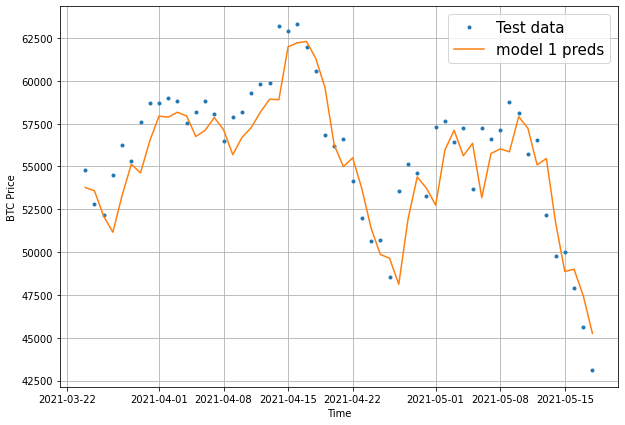

In [ ]:
val=500
plt.figure(figsize=(10,7))
plot_series(timesteps=X_test[-len(test_window):] ,prices=test_label[:,0], label="Test data",start=val)
plot_series(timesteps=X_test[-len(test_window):], prices=model_1_preds,start=val,label="model 1 preds",format='-')

### Model2: Dense model(Horizon-1, Window-30)

In [ ]:
windows,labels = make_windos(prices,window=30)

In [ ]:
train_window,test_window,train_label,test_label = create_train_test_split(windows,labels)

In [ ]:
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(128,activation="relu"),
                               tf.keras.layers.Dense(1)
])
model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae","mse"])
model_2.fit(x=train_window,y=train_label,epochs=100,validation_data=(test_window,test_label),batch_size=128,callbacks=[create_checkpoint_callback("model_2")])

Epoch 1/100
18/18 [==============================] - 1s 46ms/step - loss: 687.7861 - mae: 687.7861 - mse: 2017807.5000 - val_loss: 2114.0593 - val_mae: 2114.0593 - val_mse: 11928109.0000
Epoch 2/100
18/18 [==============================] - 1s 38ms/step - loss: 394.3737 - mae: 394.3737 - mse: 721803.3750 - val_loss: 1547.7649 - val_mae: 1547.7649 - val_mse: 7217567.0000
Epoch 3/100
18/18 [==============================] - 1s 39ms/step - loss: 260.5334 - mae: 260.5334 - mse: 332548.6875 - val_loss: 1145.4530 - val_mae: 1145.4530 - val_mse: 4045718.7500
Epoch 4/100
18/18 [==============================] - 1s 40ms/step - loss: 206.9216 - mae: 206.9216 - mse: 212239.5312 - val_loss: 969.3745 - val_mae: 969.3745 - val_mse: 2980822.5000
Epoch 5/100
18/18 [==============================] - 1s 39ms/step - loss: 180.7480 - mae: 180.7480 - mse: 162279.4688 - val_loss: 892.7870 - val_mae: 892.7870 - val_mse: 2627425.7500
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 187.

In [ ]:
loaded_model_2 = tf.keras.models.load_model("model_checkpoints/model_2/")
loaded_model_2.evaluate(test_window,test_label)

18/18 [==============================] - 0s 3ms/step - loss: 594.0211 - mae: 594.0211 - mse: 1227389.1250


[594.0210571289062, 594.0210571289062, 1227389.125]

In [ ]:
model_2_preds = model_pred(model_2,test_window)

In [ ]:
model_2_results = error_metrix(tf.squeeze(test_label),model_2_preds)
model_2_results

{'MAE': 1003.19995,
 'MSE': 2599389.5,
 'Mean absolute percentage error': 5.043159,
 'Mean absolute scaled error': 1.7536033}

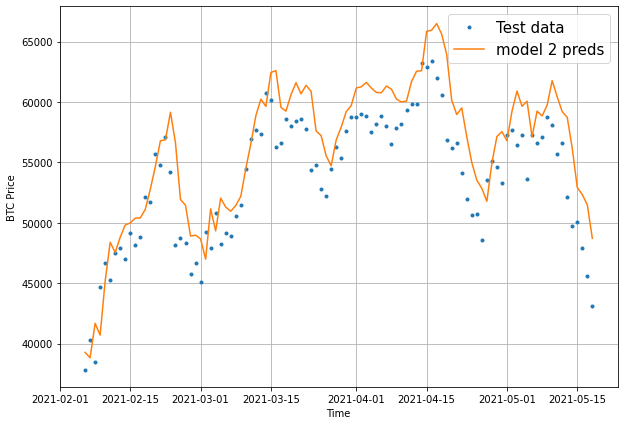

In [ ]:
val=450
plt.figure(figsize=(10,7))
plot_series(timesteps=X_test[-len(test_window):] ,prices=test_label[:,0], label="Test data",start=val)
plot_series(timesteps=X_test[-len(test_window):], prices=model_2_preds,start=val,label="model 2 preds",format='-')

### Model 3: Dense model(Horizon-7, Window-30)

In [ ]:
windows,labels = make_windos(prices,window=30,horizon=7)

In [ ]:
train_window,test_window,train_label,test_label = create_train_test_split(windows,labels)

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(7)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_window,
            train_label,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_window, test_label),
            callbacks=[create_checkpoint_callback("model_3")])

INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpoints/model_3/assets
INFO:tensorflow:Assets written to: model_checkpo

In [ ]:
loaded_model_3 = tf.keras.models.load_model("model_checkpoints/model_3/")
loaded_model_3.evaluate(test_window,test_label)

18/18 [==============================] - 0s 2ms/step - loss: 643.8102


643.8101806640625

In [ ]:
model_3_preds = model_pred(model_3,test_window)

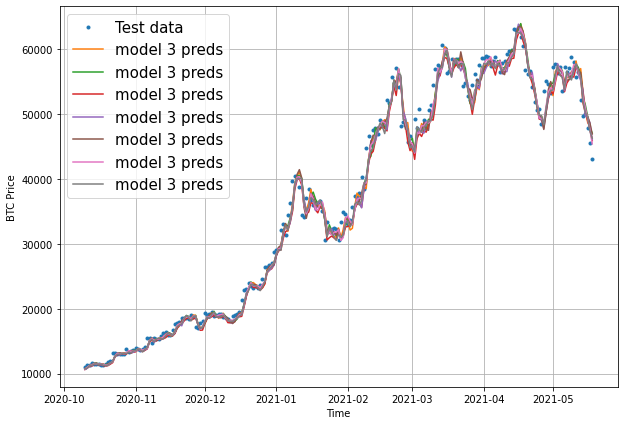

In [ ]:
val=330
plt.figure(figsize=(10,7))
plot_series(timesteps=X_test[-len(test_window):] ,prices=test_label[:,0], label="Test data",start=val)
plot_series(timesteps=X_test[-len(test_window):], prices=model_3_preds,start=val,label="model 3 preds",format='-')

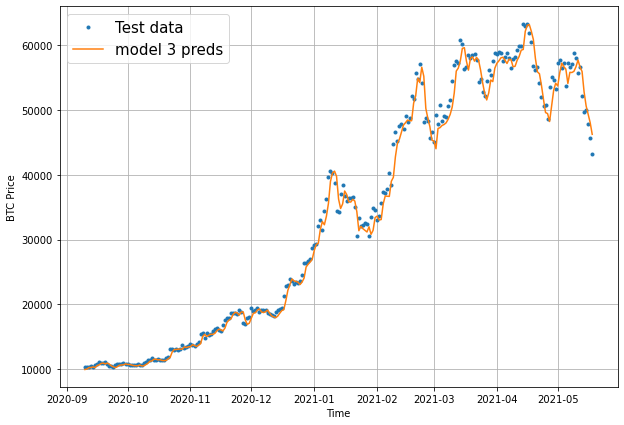

In [ ]:
val=300
plt.figure(figsize=(10,7))
plot_series(timesteps=X_test[-len(test_window):] ,prices=test_label[:,0], label="Test data",start=val)
plot_series(timesteps=X_test[-len(test_window):], prices=tf.reduce_mean(model_3_preds,axis=1),start=val,label="model 3 preds",format='-')

In [ ]:
model_3_results = error_metrix(test_label,model_3_preds)
model_3_results

{'MAE': 677.82837,
 'MSE': 1471113.0,
 'Mean absolute percentage error': 3.0583744,
 'Mean absolute scaled error': 1.1830478}

In [ ]:
naive_error_metrics

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'Mean absolute percentage error': 2.516525,
 'Mean absolute scaled error': 0.99957}

## Vidualizing all models performance till now

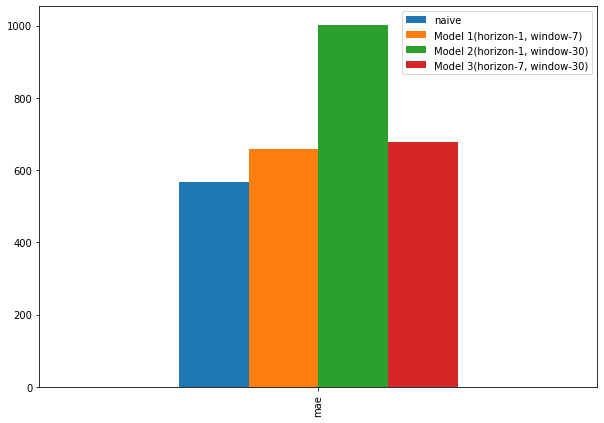

In [ ]:
pd.DataFrame({"naive":naive_error_metrics["MAE"],
             "Model 1(horizon-1, window-7)": model_1_results["MAE"],
             "Model 2(horizon-1, window-30)": model_2_results["MAE"],
             "Model 3(horizon-7, window-30)": model_3_results["MAE"]}, index=["mae"]).plot(figsize=(10,7),kind="bar");

### Model 4: Conv1D model(Horizon-1, Window-7)

In [ ]:
HORIZON =1
WINDOW =7

In [ ]:
windows,labels = make_windos(prices,window=WINDOW,horizon=HORIZON)
len(windows),len(labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = create_train_test_split(windows, labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels), train_windows.dtype

(2224, 556, 2224, 556, dtype('float64'))

expanding dimentions for making data perfect for conv1d layer

In [ ]:
expand_layer_dim = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
x = tf.constant(train_windows[0])
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_layer_dim(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_layer_dim(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
inputs = tf.keras.layers.Input(shape=(7),dtype=tf.float64)
expand_dim = expand_layer_dim(inputs)
x = tf.keras.layers.Conv1D(128,4,padding="causal",activation="relu")(expand_dim)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
output = tf.keras.layers.Dense(1)(x)
model_4 = tf.keras.Model(inputs,output)

In [ ]:
model_4.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())
model_4.fit(x=train_windows,y=train_labels,epochs=100,batch_size=128,validation_data=(test_windows,test_labels),verbose=1,callbacks=[create_checkpoint_callback("model_4")])

Epoch 1/100
18/18 [==============================] - 8s 57ms/step - loss: 2143.8872 - val_loss: 5310.6152
Epoch 2/100
18/18 [==============================] - 1s 49ms/step - loss: 355.2777 - val_loss: 1232.8088
Epoch 3/100
18/18 [==============================] - 1s 48ms/step - loss: 200.0659 - val_loss: 1024.9650
Epoch 4/100
18/18 [==============================] - 1s 61ms/step - loss: 187.1923 - val_loss: 1000.0266
Epoch 5/100
18/18 [==============================] - 1s 49ms/step - loss: 179.2896 - val_loss: 994.9611
Epoch 6/100
18/18 [==============================] - 1s 50ms/step - loss: 182.2881 - val_loss: 987.6030
Epoch 7/100
18/18 [==============================] - 1s 50ms/step - loss: 179.5690 - val_loss: 971.9341
Epoch 8/100
18/18 [==============================] - 1s 48ms/step - loss: 172.9743 - val_loss: 962.7933
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 172.0729 - val_loss: 982.1808
Epoch 10/100
18/18 [==============================] - 1s 49m

In [ ]:
model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            3712      
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
___________________________________________________________

In [ ]:
loaded_model_4 = tf.keras.models.load_model("model_checkpoints/model_4")

In [ ]:
loaded_model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 578.8848


578.884765625

In [ ]:
model_4_preds = model_pred(loaded_model_4,test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8926.19 , 8816.451, 8992.807, 8779.273, 8784.137, 8765.188,
       8691.798, 8544.998, 8496.276, 8523.158], dtype=float32)>

In [ ]:
model_4_results = error_metrix(tf.squeeze(test_labels),model_4_preds)

In [ ]:
model_4_results

{'MAE': 578.88477,
 'MSE': 1204168.9,
 'Mean absolute percentage error': 2.603904,
 'Mean absolute scaled error': 1.0169402}

### Model 5: LSTM model(Horizon-1, Window-7) 

In [ ]:
inputs = tf.keras.layers.Input(shape=(7))
expand_dim = expand_layer_dim(inputs)
# x = tf.keras.layers.LSTM(128,return_sequences=True)(expand_dim)
x = tf.keras.layers.LSTM(128,activation="relu")(expand_dim)
output = tf.keras.layers.Dense(1)(x)
model_5 = tf.keras.Model(inputs,output)
model_5.compile(loss=["mae"],
                optimizer = tf.keras.optimizers.Adam())
model_5.fit(x=train_windows,y=train_labels,epochs=100,batch_size=128,validation_data=(test_windows,test_labels),callbacks=[create_checkpoint_callback("model_5")])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2804.5286INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 4s 162ms/step - loss: 2804.5286 - val_loss: 14407.9424
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 1737.7959INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 135ms/step - loss: 1678.9122 - val_loss: 6816.4858
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 531.5542INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 135ms/step - loss: 524.2725 - val_loss: 1417.5562
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 234.2518INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 134ms/step - loss: 231.5581 - val_loss: 1229.8317
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 190.7559INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 3s 155ms/step - loss: 188.7931 - val_loss: 1032.7042
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 181.6600INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 136ms/step - loss: 183.4289 - val_loss: 1024.7174
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 184.0138 - val_loss: 1045.4136
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 181.5940 - val_loss: 1052.2739
Epoch 9/100
18/18 [==============================] - 0s 10ms/step - loss: 179.9724 - val_loss: 1038.6570
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 177.6686INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 135ms/step - loss: 179.0035 - val_loss: 1017.4258
Epoch 11/100
18/18 [==============================] - 0s 9ms/step - loss: 178.9746 - val_loss: 1018.9355
Epoch 12/100
16/18 [=========================>....] - ETA: 0s - loss: 178.5558INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 3s 152ms/step - loss: 177.1979 - val_loss: 1013.7540
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 173.5110INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 138ms/step - loss: 175.6613 - val_loss: 990.5361
Epoch 14/100
18/18 [==============================] - 0s 10ms/step - loss: 174.3959 - val_loss: 1018.7653
Epoch 15/100
18/18 [==============================] - 0s 9ms/step - loss: 173.8794 - val_loss: 1004.4620
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 173.5038INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 135ms/step - loss: 171.9816 - val_loss: 962.4548
Epoch 17/100
18/18 [==============================] - 0s 9ms/step - loss: 170.6799 - val_loss: 1019.6190
Epoch 18/100
18/18 [==============================] - 0s 8ms/step - loss: 170.2047 - val_loss: 1000.7981
Epoch 19/100
18/18 [==============================] - 0s 9ms/step - loss: 168.6344 - val_loss: 992.4367
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 167.3886INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 133ms/step - loss: 167.9839 - val_loss: 938.8922
Epoch 21/100
18/18 [==============================] - 0s 9ms/step - loss: 165.4699 - val_loss: 946.0856
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 165.0076INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 3s 155ms/step - loss: 164.1094 - val_loss: 935.7051
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 162.9087INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 137ms/step - loss: 164.1087 - val_loss: 924.3380
Epoch 24/100
18/18 [==============================] - 0s 9ms/step - loss: 161.9579 - val_loss: 939.8121
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 164.8870INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 133ms/step - loss: 159.8659 - val_loss: 916.8152
Epoch 26/100
15/18 [========================>.....] - ETA: 0s - loss: 163.4703INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 135ms/step - loss: 158.6101 - val_loss: 895.0463
Epoch 27/100
18/18 [==============================] - 0s 9ms/step - loss: 158.1184 - val_loss: 907.8393
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 156.7880INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 3s 152ms/step - loss: 156.9878 - val_loss: 886.9715
Epoch 29/100
17/18 [===========================>..] - ETA: 0s - loss: 151.5463INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 133ms/step - loss: 154.1601 - val_loss: 876.3431
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 153.5600INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 136ms/step - loss: 153.6441 - val_loss: 860.1538
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 151.0371INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 3s 154ms/step - loss: 151.5153 - val_loss: 841.0349
Epoch 32/100
18/18 [==============================] - 0s 10ms/step - loss: 150.4960 - val_loss: 842.1405
Epoch 33/100
18/18 [==============================] - 0s 10ms/step - loss: 149.9265 - val_loss: 939.7573
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 149.0098INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 134ms/step - loss: 150.0827 - val_loss: 822.2396
Epoch 35/100
18/18 [==============================] - 0s 9ms/step - loss: 145.3268 - val_loss: 823.0300
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 144.9068INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 133ms/step - loss: 145.4728 - val_loss: 799.2786
Epoch 37/100
18/18 [==============================] - 0s 9ms/step - loss: 143.8494 - val_loss: 800.8018
Epoch 38/100
18/18 [==============================] - 0s 9ms/step - loss: 141.7234 - val_loss: 800.9574
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 139.9669INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 3s 153ms/step - loss: 141.3175 - val_loss: 775.6818
Epoch 40/100
16/18 [=========================>....] - ETA: 0s - loss: 142.3323INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 135ms/step - loss: 141.2191 - val_loss: 769.5858
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 138.2714INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 136ms/step - loss: 137.3629 - val_loss: 765.7424
Epoch 42/100
16/18 [=========================>....] - ETA: 0s - loss: 137.1024INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 135ms/step - loss: 136.8411 - val_loss: 761.1289
Epoch 43/100
18/18 [==============================] - 0s 9ms/step - loss: 135.4540 - val_loss: 774.6844
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 134.5014INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 3s 155ms/step - loss: 133.3869 - val_loss: 743.4340
Epoch 45/100
18/18 [==============================] - 0s 9ms/step - loss: 132.5587 - val_loss: 760.9282
Epoch 46/100
17/18 [===========================>..] - ETA: 0s - loss: 131.3856INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 134ms/step - loss: 131.6159 - val_loss: 732.9542
Epoch 47/100
17/18 [===========================>..] - ETA: 0s - loss: 130.8159INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 134ms/step - loss: 130.4518 - val_loss: 728.5362
Epoch 48/100
18/18 [==============================] - 0s 9ms/step - loss: 129.3006 - val_loss: 730.7258
Epoch 49/100
18/18 [==============================] - ETA: 0s - loss: 128.2550INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 3s 152ms/step - loss: 128.2550 - val_loss: 713.6846
Epoch 50/100
18/18 [==============================] - 0s 10ms/step - loss: 130.9321 - val_loss: 726.2835
Epoch 51/100
18/18 [==============================] - 0s 9ms/step - loss: 131.9076 - val_loss: 740.8910
Epoch 52/100
16/18 [=========================>....] - ETA: 0s - loss: 135.5255INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 136ms/step - loss: 132.9753 - val_loss: 695.1912
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 127.3892 - val_loss: 704.2792
Epoch 54/100
18/18 [==============================] - 0s 9ms/step - loss: 125.2439 - val_loss: 709.9711
Epoch 55/100
16/18 [=========================>....] - ETA: 0s - loss: 126.3833INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 134ms/step - loss: 123.6096 - val_loss: 684.1490
Epoch 56/100
18/18 [==============================] - 0s 9ms/step - loss: 123.9667 - val_loss: 686.6760
Epoch 57/100
15/18 [========================>.....] - ETA: 0s - loss: 125.2301INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 133ms/step - loss: 123.6994 - val_loss: 672.1978
Epoch 58/100
17/18 [===========================>..] - ETA: 0s - loss: 120.1265INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 3s 155ms/step - loss: 120.3909 - val_loss: 662.6537
Epoch 59/100
17/18 [===========================>..] - ETA: 0s - loss: 118.4717INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 137ms/step - loss: 119.6290 - val_loss: 659.8716
Epoch 60/100
18/18 [==============================] - 0s 10ms/step - loss: 119.4309 - val_loss: 664.5811
Epoch 61/100
18/18 [==============================] - 0s 9ms/step - loss: 119.8358 - val_loss: 699.0834
Epoch 62/100
18/18 [==============================] - 0s 9ms/step - loss: 122.4444 - val_loss: 721.3209
Epoch 63/100
17/18 [===========================>..] - ETA: 0s - loss: 122.4619INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 133ms/step - loss: 122.2151 - val_loss: 652.8698
Epoch 64/100
17/18 [===========================>..] - ETA: 0s - loss: 116.7399INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 3s 152ms/step - loss: 117.1771 - val_loss: 646.3103
Epoch 65/100
16/18 [=========================>....] - ETA: 0s - loss: 116.9691INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 136ms/step - loss: 116.9157 - val_loss: 637.1575
Epoch 66/100
18/18 [==============================] - 0s 10ms/step - loss: 116.5772 - val_loss: 659.5068
Epoch 67/100
16/18 [=========================>....] - ETA: 0s - loss: 113.2205INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 138ms/step - loss: 116.1259 - val_loss: 631.0637
Epoch 68/100
17/18 [===========================>..] - ETA: 0s - loss: 117.1885INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 135ms/step - loss: 116.4260 - val_loss: 628.3860
Epoch 69/100
18/18 [==============================] - 0s 9ms/step - loss: 118.3536 - val_loss: 633.6782
Epoch 70/100
17/18 [===========================>..] - ETA: 0s - loss: 114.0113INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 3s 153ms/step - loss: 115.4718 - val_loss: 623.8244
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 115.2069 - val_loss: 664.7181
Epoch 72/100
18/18 [==============================] - 0s 10ms/step - loss: 119.2440 - val_loss: 643.7936
Epoch 73/100
17/18 [===========================>..] - ETA: 0s - loss: 117.7447INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 138ms/step - loss: 116.7145 - val_loss: 619.4916
Epoch 74/100
18/18 [==============================] - 0s 10ms/step - loss: 115.5550 - val_loss: 638.7492
Epoch 75/100
18/18 [==============================] - 0s 10ms/step - loss: 114.7679 - val_loss: 634.7174
Epoch 76/100
17/18 [===========================>..] - ETA: 0s - loss: 114.0062INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 138ms/step - loss: 114.0962 - val_loss: 611.9473
Epoch 77/100
18/18 [==============================] - 0s 9ms/step - loss: 114.7743 - val_loss: 661.0469
Epoch 78/100
18/18 [==============================] - 0s 9ms/step - loss: 116.2745 - val_loss: 620.1562
Epoch 79/100
17/18 [===========================>..] - ETA: 0s - loss: 113.7442INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 3s 156ms/step - loss: 113.2632 - val_loss: 607.7816
Epoch 80/100
18/18 [==============================] - 0s 9ms/step - loss: 112.4564 - val_loss: 636.8754
Epoch 81/100
18/18 [==============================] - 0s 9ms/step - loss: 112.5762 - val_loss: 641.9697
Epoch 82/100
18/18 [==============================] - 0s 10ms/step - loss: 116.1159 - val_loss: 622.5283
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 113.2163 - val_loss: 677.9759
Epoch 84/100
18/18 [==============================] - 0s 9ms/step - loss: 115.7278 - val_loss: 624.4727
Epoch 85/100
18/18 [==============================] - 0s 9ms/step - loss: 113.5612 - val_loss: 616.4445
Epoch 86/100
18/18 [==============================] - 0s 10ms/step - loss: 113.8628 - val_loss: 614.4949
Epoch 87/100
17/18 [===========================>..] - ETA: 0s - loss: 113.2264INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 137ms/step - loss: 112.6459 - val_loss: 599.8044
Epoch 88/100
18/18 [==============================] - 0s 9ms/step - loss: 111.2772 - val_loss: 600.4467
Epoch 89/100
18/18 [==============================] - 0s 9ms/step - loss: 111.0189 - val_loss: 618.0690
Epoch 90/100
18/18 [==============================] - 0s 9ms/step - loss: 115.3486 - val_loss: 628.9528
Epoch 91/100
18/18 [==============================] - 0s 9ms/step - loss: 114.2048 - val_loss: 650.6410
Epoch 92/100
16/18 [=========================>....] - ETA: 0s - loss: 111.7632INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 137ms/step - loss: 112.2565 - val_loss: 597.7681
Epoch 93/100
15/18 [========================>.....] - ETA: 0s - loss: 115.0885INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 136ms/step - loss: 111.9666 - val_loss: 595.6187
Epoch 94/100
18/18 [==============================] - 0s 9ms/step - loss: 110.5860 - val_loss: 595.9861
Epoch 95/100
17/18 [===========================>..] - ETA: 0s - loss: 109.9510INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 3s 157ms/step - loss: 110.5470 - val_loss: 593.5345
Epoch 96/100
18/18 [==============================] - 0s 9ms/step - loss: 112.4156 - val_loss: 606.3714
Epoch 97/100
18/18 [==============================] - 0s 9ms/step - loss: 114.6077 - val_loss: 656.9077
Epoch 98/100
17/18 [===========================>..] - ETA: 0s - loss: 114.6025INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 136ms/step - loss: 113.8207 - val_loss: 591.5417
Epoch 99/100
16/18 [=========================>....] - ETA: 0s - loss: 110.0676INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_5/assets


18/18 [==============================] - 2s 134ms/step - loss: 111.0679 - val_loss: 590.4626
Epoch 100/100
18/18 [==============================] - 0s 9ms/step - loss: 115.8838 - val_loss: 611.4272


In [ ]:
loaded_model_5 = tf.keras.models.load_model("model_checkpoints/model_5")
loaded_model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 590.4626


590.4625854492188

In [ ]:
model_5_preds = model_pred(loaded_model_5,test_windows)

In [ ]:
model_5_results = error_metrix(tf.squeeze(test_labels),model_5_preds)
model_5_results

{'MAE': 590.4626,
 'MSE': 1249924.9,
 'Mean absolute percentage error': 2.6537366,
 'Mean absolute scaled error': 1.0372792}

Making data ready for multivariate model

`a multivariate data is data with more than one factors to predict the output`

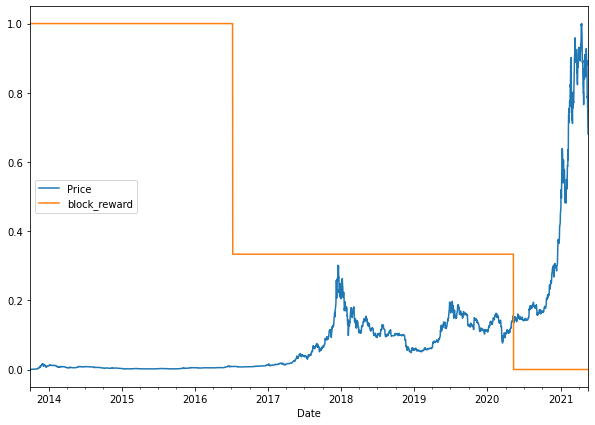

In [ ]:
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = 25
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = 12.5
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = 6.25

from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

Using pandas dataframe for data as it is more compactable with tensorflow

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW):
  bitcoin_prices_block_windowed[f"Price{i+1}"] = bitcoin_prices_block_windowed["Price"].shift(periods=i+1)
bitcoin_prices_block_windowed.head(10)

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
X = bitcoin_prices_block_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y = bitcoin_prices_block_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
split = int(0.8*len(X))
X_train,y_train = X[:split],y[:split]
X_test,y_test = X[split:],y[split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

### Model 6: Dense model (with multivariate data)

In [ ]:
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(128,activation="relu"),
                               tf.keras.layers.Dense(1)
])
model_6.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())
model_6.fit(X_train,y_train,epochs=100,batch_size=128,validation_data=(X_test,y_test),callbacks=[create_checkpoint_callback("model_6")])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 217.7679INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 42ms/step - loss: 215.9447 - val_loss: 1135.2073
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 180.9991INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 179.2904 - val_loss: 1030.3615
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 135.4495INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 162.5982 - val_loss: 881.7005
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 159.0965INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 36ms/step - loss: 158.7885 - val_loss: 858.0788
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 149.2002 - val_loss: 893.1807
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 118.3966INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 142.5471 - val_loss: 777.6857
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 136.8741 - val_loss: 866.3533
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 128.7425INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 138.0307 - val_loss: 742.0164
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 143.7346INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 36ms/step - loss: 143.7346 - val_loss: 720.8549
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 134.8779INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 36ms/step - loss: 134.8779 - val_loss: 703.1318
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 126.3347 - val_loss: 829.4559
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 131.4427 - val_loss: 781.8853
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 144.0952 - val_loss: 707.2431
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 129.8728INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 36ms/step - loss: 129.8728 - val_loss: 668.0237
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 130.8074 - val_loss: 747.3629
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 123.7334INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 123.7334 - val_loss: 659.1384
Epoch 17/100
16/18 [=========================>....] - ETA: 0s - loss: 116.6615INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 118.8732 - val_loss: 657.6887
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 119.1900INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 37ms/step - loss: 119.1900 - val_loss: 631.0947
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 121.6026 - val_loss: 833.8680
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 121.4219INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 121.4219 - val_loss: 623.4764
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 117.4199INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 118.2697 - val_loss: 619.5355
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 117.1932 - val_loss: 670.0099
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 118.6551 - val_loss: 682.1456
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0863 - val_loss: 625.0035
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 113.0300INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 113.0300 - val_loss: 616.4199
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 113.4052 - val_loss: 617.9764
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 116.3514 - val_loss: 638.9521
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 115.2407INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 115.2407 - val_loss: 596.5662
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0046 - val_loss: 614.6031
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 119.2790 - val_loss: 604.5703
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0277 - val_loss: 599.3051
Epoch 32/100
13/18 [====================>.........] - ETA: 0s - loss: 113.7782INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 37ms/step - loss: 110.7727 - val_loss: 592.6163
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 113.2453 - val_loss: 644.4572
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 138.9287INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 34ms/step - loss: 111.8717 - val_loss: 588.9487
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7617 - val_loss: 589.9012
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 153.4885INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 50ms/step - loss: 112.1637 - val_loss: 585.1451
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2309 - val_loss: 587.2878
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6196 - val_loss: 652.2650
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3106 - val_loss: 594.0402
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3050 - val_loss: 617.4739
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 105.2424INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 34ms/step - loss: 108.7950 - val_loss: 582.4586
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 118.4080 - val_loss: 617.2788
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 114.2613 - val_loss: 686.3821
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6657 - val_loss: 583.0139
Epoch 45/100
16/18 [=========================>....] - ETA: 0s - loss: 107.1240INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 36ms/step - loss: 107.9047 - val_loss: 578.0785
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9022 - val_loss: 632.4855
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4141 - val_loss: 580.0035
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1835 - val_loss: 619.4876
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7634 - val_loss: 635.2560
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 115.9783 - val_loss: 739.6441
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 116.1976 - val_loss: 617.8326
Epoch 52/100
18/18 [==============================] - ETA: 0s - loss: 112.6886INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 112.6886 - val_loss: 574.9021
Epoch 53/100
18/18 [==============================] - ETA: 0s - loss: 109.8903INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 109.8903 - val_loss: 574.6484
Epoch 54/100
16/18 [=========================>....] - ETA: 0s - loss: 108.1626INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 107.1495 - val_loss: 574.5199
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3159 - val_loss: 627.6616
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1569 - val_loss: 862.2571
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 136.4576 - val_loss: 696.6095
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 116.6553 - val_loss: 616.1696
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2395 - val_loss: 609.1069
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8286 - val_loss: 623.2779
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9122 - val_loss: 579.3519
Epoch 62/100
18/18 [==============================] - ETA: 0s - loss: 105.6812INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 105.6812 - val_loss: 567.5502
Epoch 63/100
18/18 [==============================] - ETA: 0s - loss: 107.0794INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 35ms/step - loss: 107.0794 - val_loss: 566.5386
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 106.4092 - val_loss: 602.1478
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1158 - val_loss: 568.9116
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 105.6948 - val_loss: 571.4413
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0975 - val_loss: 646.9503
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8995 - val_loss: 574.5634
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 107.4827 - val_loss: 614.4115
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 116.6411 - val_loss: 635.3412
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2043 - val_loss: 567.5435
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 11

INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 36ms/step - loss: 107.6658 - val_loss: 566.2035
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5813 - val_loss: 578.9556
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5668 - val_loss: 592.6003
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3595 - val_loss: 610.2844
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9270 - val_loss: 566.9373
Epoch 80/100
18/18 [==============================] - ETA: 0s - loss: 106.4514INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 37ms/step - loss: 106.4514 - val_loss: 566.1255
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 106.5288 - val_loss: 586.8754
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 118.0314 - val_loss: 573.9413
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 113.9017 - val_loss: 712.3964
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0051 - val_loss: 567.3115
Epoch 85/100
14/18 [======================>.......] - ETA: 0s - loss: 103.8697INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


INFO:tensorflow:Assets written to: model_checkpoints/model_6/assets


18/18 [==============================] - 1s 37ms/step - loss: 107.5075 - val_loss: 565.3438
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 106.6095 - val_loss: 566.3420
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 106.1019 - val_loss: 609.6851
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2306 - val_loss: 579.5245
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 106.1676 - val_loss: 611.4715
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5788 - val_loss: 565.9228
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1101 - val_loss: 583.0372
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2235 - val_loss: 619.0751
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 121.1280 - val_loss: 636.6359
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 11

In [ ]:
loaded_model_6 = tf.keras.models.load_model("model_checkpoints/model_6/")
model_6_preds = model_pred(loaded_model_6,X_test)
model_6_results = error_metrix(tf.squeeze(y_test),model_6_preds)
model_6_results

{'MAE': 565.34375,
 'MSE': 1158676.5,
 'Mean absolute percentage error': 2.539125,
 'Mean absolute scaled error': 0.9931524}

### NBeats Algorithms

## Trying to implement NBeats research paper algorithm for time series forecasting 

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,input_size:int,theta_size:int,n_layers:int,n_neurons:int,horizon:int,**kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.n_layers = n_layers
    self.n_neurons = n_neurons
    self.horizon = horizon
    self.hidden = [tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size,activation="linear", name="Theta")
  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x) 
    backcast,forecast = theta[:,:self.input_size], theta[:, -self.horizon:]
    return backcast,forecast

In [ ]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW, 
                                       theta_size=WINDOW+HORIZON, 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)
dummy_inputs = tf.expand_dims(tf.range(WINDOW) + 1, axis=0)

backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.3992805   0.64474386 -0.3948719  -1.1792767  -0.63454235 -1.2073143
  0.61047304]
Forecast: 0.07165676355361938


In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_NBeats = bitcoin_prices.copy()
for i in range(WINDOW):
  bitcoin_prices_NBeats[f"Price{i+1}"] = bitcoin_prices_NBeats["Price"].shift(i+1)
bitcoin_prices_NBeats.dropna().head()

,Price,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
X = bitcoin_prices_NBeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_NBeats.dropna()["Price"]

split = int(0.8*len(X))
X_train,y_train = X[:split],y[:split]
X_test,y_test = X[split:],y[split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [ ]:
train_window_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_label_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_window_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_label_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_window_dataset,train_label_dataset))
test_dataset = tf.data.Dataset.zip((test_window_dataset,test_label_dataset))
BATCH_SIZE = 1024

train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset,test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Model 7: NBeats Algorithm

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 00245: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00345: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 5s, sys: 3.14 s, total: 2min 9s
Wall time: 3min 2s


In [ ]:
model_7.evaluate(test_dataset)
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

1/1 [==============================] - 0s 49ms/step - loss: 570.8361 - mae: 570.8361 - mse: 1141257.0000


[570.8360595703125, 570.8360595703125, 1141257.0]

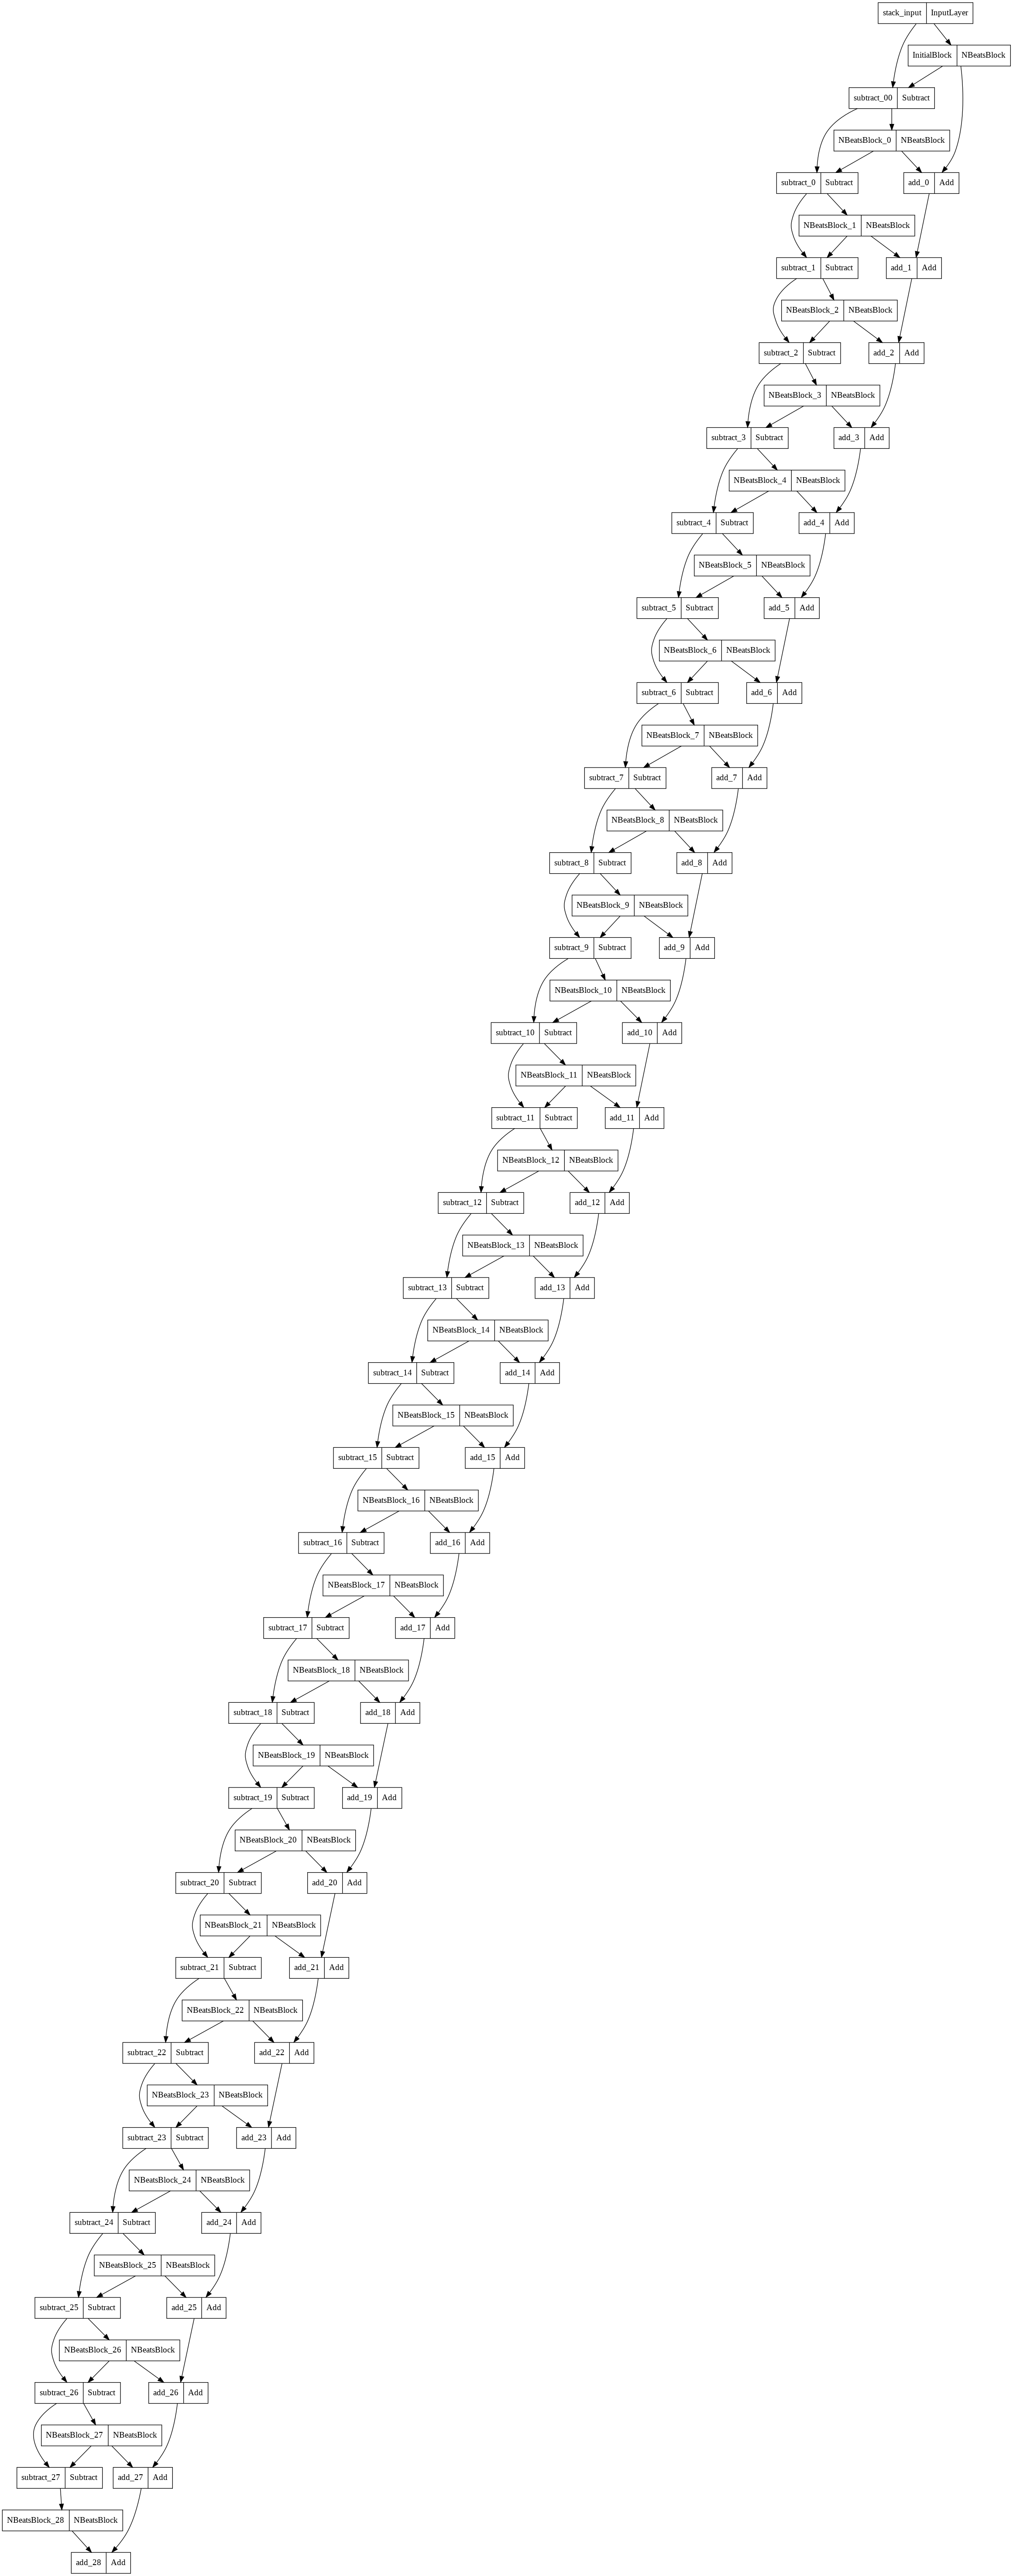

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

### Model 8: Ensemble model

`Ensemble model`- using multiple model and ensemble them together to make pridections

In [ ]:
def get_ensemble_models(horizon=HORIZON,train_data=train_dataset, test_data=test_dataset, num_iter=10, num_epochs=100, loss_fns=["mae", "mse", "mape"]):
  
  ensemble_models = []
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      ensemble_models.append(model)

  return ensemble_models 


In [ ]:
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 00914: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00574: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00165: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00282: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00382: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 00409: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00509: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 00185: ReduceLR

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8798.549,  8773.711,  9032.99 , ..., 50155.832, 49323.48 ,
        46657.477],
       [ 8741.966,  8723.621,  9050.123, ..., 49328.703, 48500.625,
        45337.25 ],
       [ 8732.57 ,  8719.407,  9093.386, ..., 49921.9  , 47992.15 ,
        45316.45 ],
       ...,
       [ 8863.031,  8741.276,  9033.052, ..., 49262.246, 49346.45 ,
        46367.113],
       [ 8724.746,  8801.955,  9099.764, ..., 49568.562, 48517.562,
        45039.82 ],
       [ 8823.311,  8768.297,  9047.492, ..., 49759.902, 48090.945,
        45874.336]], dtype=float32)>

In [ ]:
ensemble_results = error_metrix(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'MAE': 566.59625,
 'MSE': 1145631.2,
 'Mean absolute percentage error': 2.5743556,
 'Mean absolute scaled error': 0.9953527}

In [ ]:
model_1_results

{'MAE': 658.6524,
 'MSE': 1357163.0,
 'Mean absolute percentage error': 3.0200505,
 'Mean absolute scaled error': 1.1570698}

plotting data with uper limit and lower limits

In [ ]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96 * std
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper


lower, upper = get_upper_lower(preds=ensemble_preds)

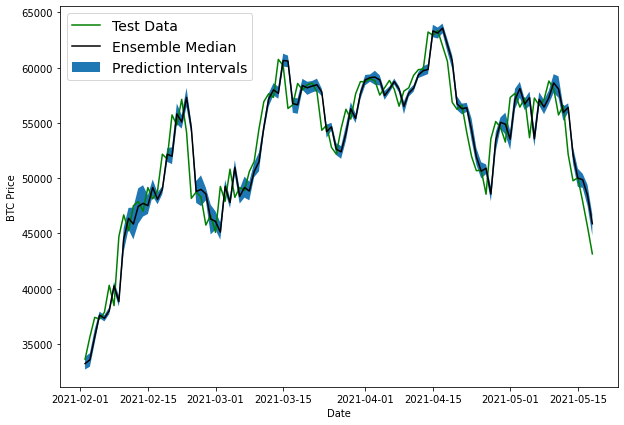

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

offset=450
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);